In [1]:
import pandas as pd

cab_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
city_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
customer_id_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
transaction_id_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'

cab_data = pd.read_csv(cab_url)
city_data = pd.read_csv(city_url)
customer_id_data = pd.read_csv(customer_id_url)
transaction_id_data = pd.read_csv(transaction_id_url)


In [2]:
print(cab_data.head())
print(city_data.head())
print(customer_id_data.head())
print(transaction_id_data.head())


   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   

In [7]:
merged_data = pd.merge(cab_data, transaction_id_data, on='Transaction ID')

merged_data = pd.merge(merged_data, customer_id_data, on='Customer ID')



In [8]:
final_data = pd.merge(merged_data, city_data, on='City')


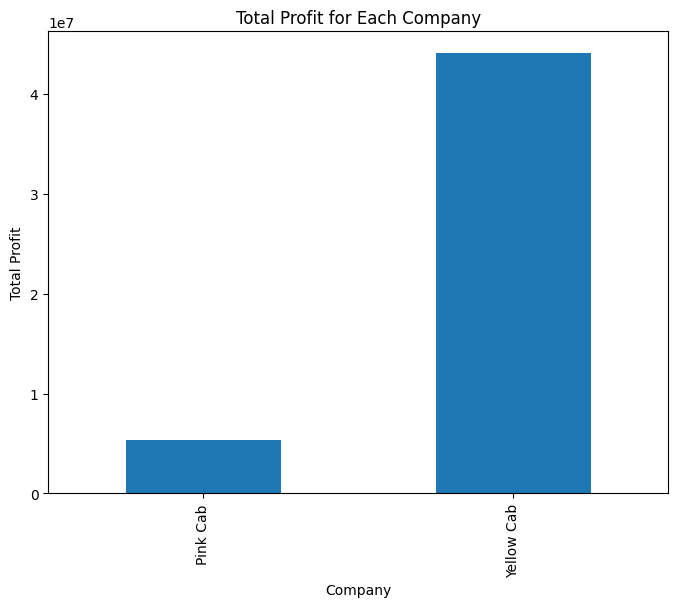

In [10]:
import matplotlib.pyplot as plt

cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

total_profit = cab_data.groupby('Company')['Profit'].sum()

total_profit.plot(kind='bar', figsize=(8, 6))
plt.title('Total Profit for Each Company')
plt.ylabel('Total Profit')
plt.show()



In [12]:
print("Columns in cab_data: ", cab_data.columns)
print("Columns in customer_id_data: ", customer_id_data.columns)



Columns in cab_data:  Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit'],
      dtype='object')
Columns in customer_id_data:  Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')


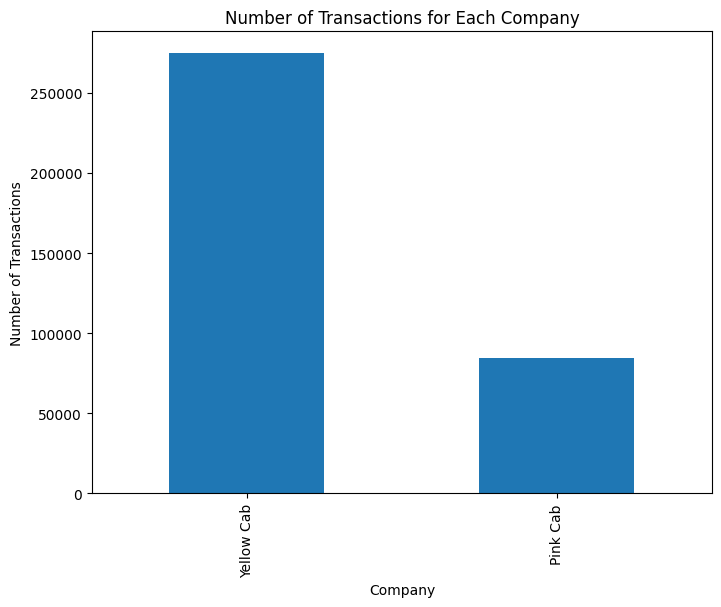

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

company_counts = cab_data['company'].value_counts()

plt.figure(figsize=(8, 6))
company_counts.plot(kind='bar')
plt.title('Number of Transactions for Each Company')
plt.xlabel('Company')
plt.ylabel('Number of Transactions')
plt.show()


In [20]:
print("Columns in cab_data: ", cab_data.columns)


Columns in cab_data:  Index(['transaction id', 'date of travel', 'company', 'city', 'km travelled',
       'price charged', 'cost of trip', 'profit'],
      dtype='object')


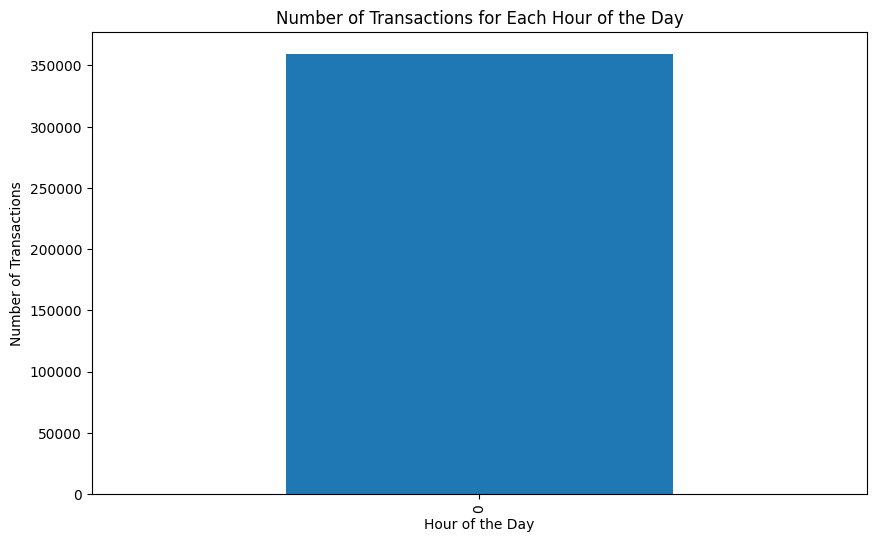

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

cab_data['Date of Travel'] = pd.TimedeltaIndex(cab_data['date of travel'], unit='d') + pd.to_datetime('1900-01-01')

cab_data['Hour of Travel'] = cab_data['Date of Travel'].dt.hour

hourly_counts = cab_data['Hour of Travel'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.title('Number of Transactions for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()


In [42]:
print("Columns in cab_data: ", cab_data.columns)
print("Columns in customer_id_data: ", customer_id_data.columns)

Columns in cab_data:  Index(['transaction_id', 'date of travel', 'company', 'city', 'km travelled',
       'price charged', 'cost of trip', 'profit', 'Date of Travel',
       'Hour of Travel'],
      dtype='object')
Columns in customer_id_data:  Index(['customer id', 'gender', 'age', 'income (usd/month)'], dtype='object')


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [48]:
url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
cab_data = pd.read_csv(url)


In [49]:
average_distance = cab_data.groupby('Company')['KM Travelled'].mean()
print(average_distance)


Company
Pink Cab      22.559917
Yellow Cab    22.569517
Name: KM Travelled, dtype: float64


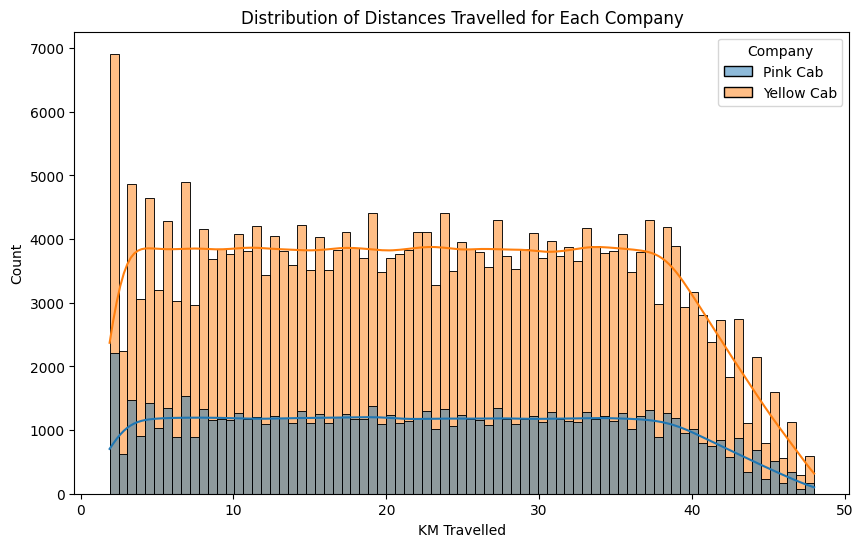

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cab_data, x='KM Travelled', hue='Company', kde=True)
plt.title('Distribution of Distances Travelled for Each Company')
plt.xlabel('KM Travelled')
plt.show()


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [52]:
average_fare = cab_data.groupby('Company')['Price Charged'].mean()
print(average_fare)


Company
Pink Cab      310.800856
Yellow Cab    458.181990
Name: Price Charged, dtype: float64


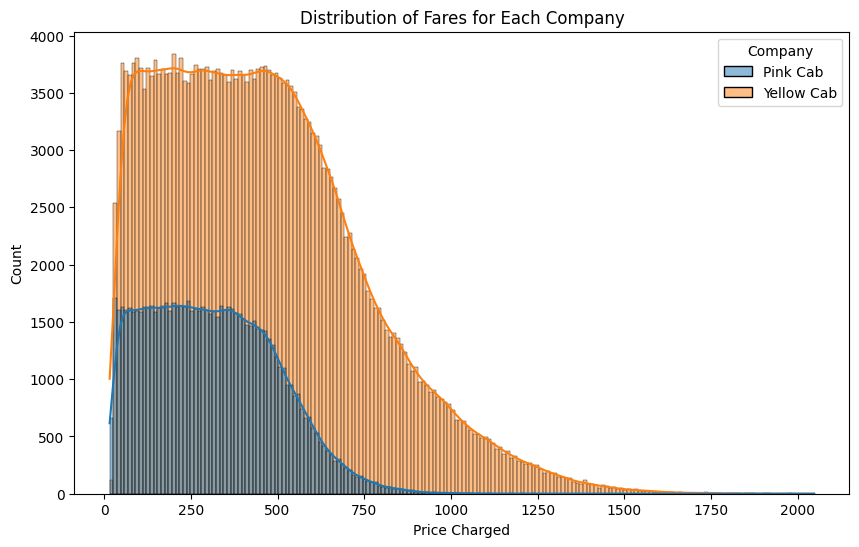

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cab_data, x='Price Charged', hue='Company', kde=True)
plt.title('Distribution of Fares for Each Company')
plt.xlabel('Price Charged')
plt.show()


In [59]:
import numpy as np

bins = [0, 25, 50, np.inf]
labels = ['Young', 'Middle-aged', 'Senior']
merged_data['Age Segment'] = pd.cut(merged_data['Age'], bins=bins, labels=labels)


In [60]:
company_preference = merged_data.groupby(['Age Segment', 'Company']).size().unstack().apply(lambda x: x / x.sum(), axis=1)


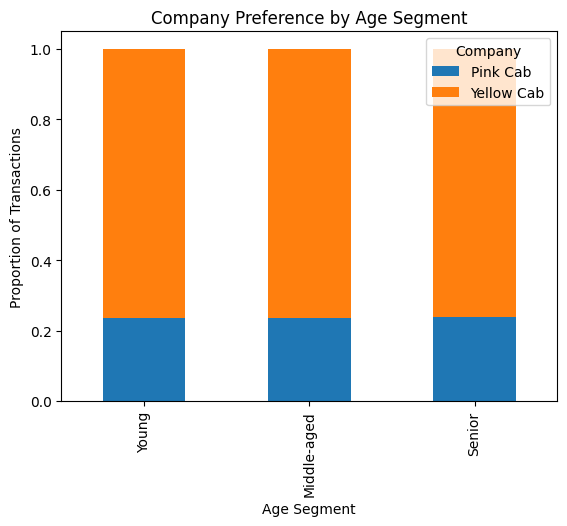

In [61]:
company_preference.plot(kind='bar', stacked=True)
plt.ylabel('Proportion of Transactions')
plt.title('Company Preference by Age Segment')
plt.show()
